**Abstract**

Parkinson's disease is a brain disorder that causes unintended or uncontrollable movements, such as shaking, stiffness, and difficulty with balance and coordination. Symptoms usually begin gradually and worsen over time. As the disease progresses, people may have difficulty walking and talking.

In [1]:
# Importing necessary components
import numpy as np
import pandas as pd
import os, sys
import lux
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [2]:
# Load the dataset
df=pd.read_csv('parkinsons.data')
df.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
df.shape

(195, 24)

Attribute Information:

Matrix column entries (attributes):

***name*** - ASCII subject name and recording number

***MDVP:Fo(Hz) ***- Average vocal fundamental frequency

***MDVP:Fhi(Hz)*** - Maximum vocal fundamental frequency

***MDVP:Flo(Hz)*** - Minimum vocal fundamental frequency

***MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP*** - Several measures of variation in fundamental frequency

***MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA*** - Several measures of variation in amplitude

***NHR,HNR ***- Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

***RPDE,D2*** - Two nonlinear dynamical complexity measures

***DFA*** - Signal fractal scaling exponent

***spread1,spread2,PPE*** - Three nonlinear measures of fundamental frequency variation

In [4]:
# Checking if null/missing values exist in the dataset
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [5]:
# Checking the data types of the attributes
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [6]:
# Finding unique values to check for outliers, unintended characters, and spelling mistakes
for i in df.columns:
    print(i)
    #.tolist() converts column to list 
    print(set(df[i].tolist()))

name
{'phon_R01_S35_6', 'phon_R01_S21_5', 'phon_R01_S42_6', 'phon_R01_S17_6', 'phon_R01_S22_1', 'phon_R01_S19_3', 'phon_R01_S07_2', 'phon_R01_S01_4', 'phon_R01_S33_5', 'phon_R01_S49_5', 'phon_R01_S05_1', 'phon_R01_S07_6', 'phon_R01_S31_1', 'phon_R01_S05_2', 'phon_R01_S50_3', 'phon_R01_S39_2', 'phon_R01_S10_3', 'phon_R01_S13_1', 'phon_R01_S07_4', 'phon_R01_S22_4', 'phon_R01_S16_6', 'phon_R01_S19_5', 'phon_R01_S26_6', 'phon_R01_S49_3', 'phon_R01_S50_4', 'phon_R01_S27_4', 'phon_R01_S32_3', 'phon_R01_S18_1', 'phon_R01_S21_6', 'phon_R01_S26_2', 'phon_R01_S05_4', 'phon_R01_S17_1', 'phon_R01_S17_2', 'phon_R01_S20_5', 'phon_R01_S25_5', 'phon_R01_S25_6', 'phon_R01_S02_2', 'phon_R01_S19_4', 'phon_R01_S08_6', 'phon_R01_S33_1', 'phon_R01_S31_4', 'phon_R01_S16_2', 'phon_R01_S42_2', 'phon_R01_S27_3', 'phon_R01_S35_1', 'phon_R01_S35_7', 'phon_R01_S39_4', 'phon_R01_S06_3', 'phon_R01_S44_5', 'phon_R01_S33_6', 'phon_R01_S35_2', 'phon_R01_S16_4', 'phon_R01_S22_3', 'phon_R01_S31_5', 'phon_R01_S44_1', 'pho

AxesSubplot(0.125,0.11;0.775x0.77)


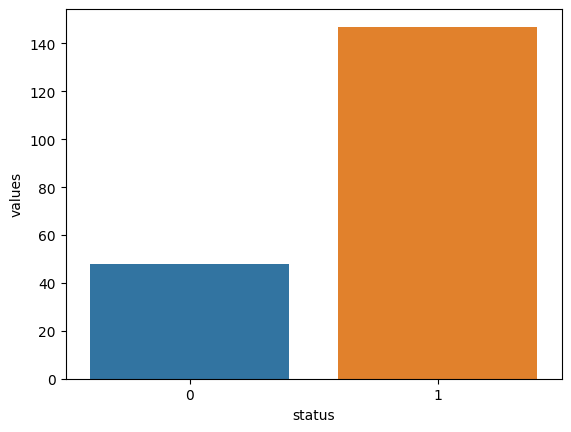

In [7]:
# Checking the label imbalance (checking if the control group and experimental group are balanced)
import matplotlib.pyplot as plt
import seaborn as sns

# Creates a dataframe that has a column of the groups and the number of values within them
temp=df['status'].value_counts()
temp_df=pd.DataFrame({'status': temp.index,'values': temp.values})
print(sns.barplot(x='status',y='values',data=temp_df))

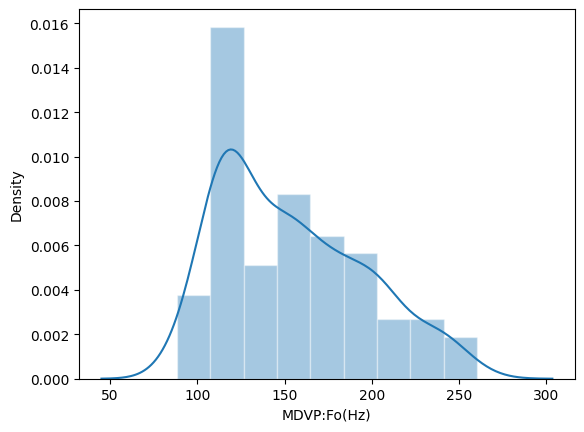

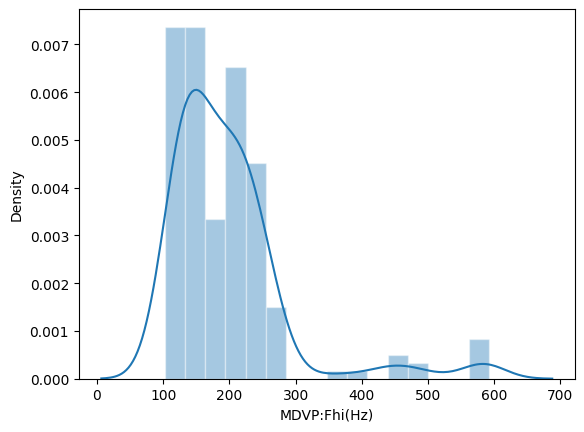

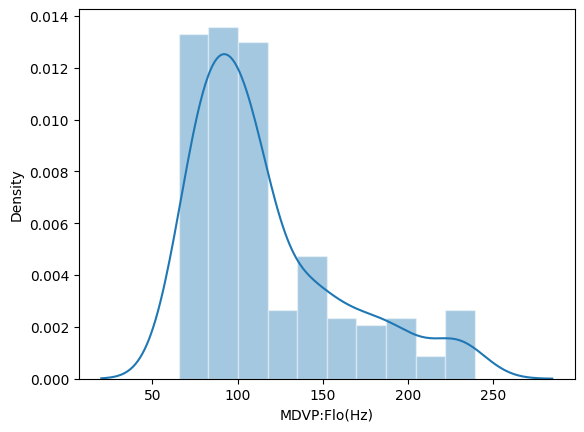

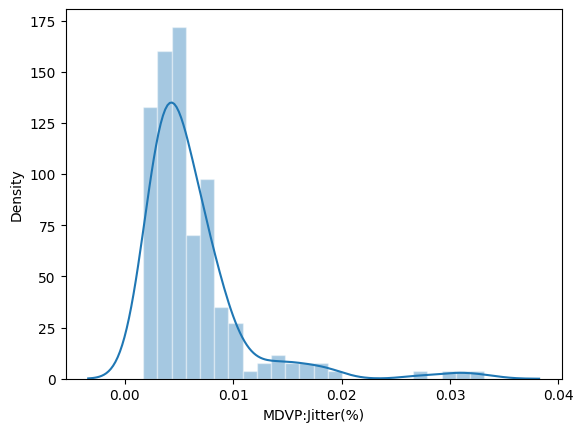

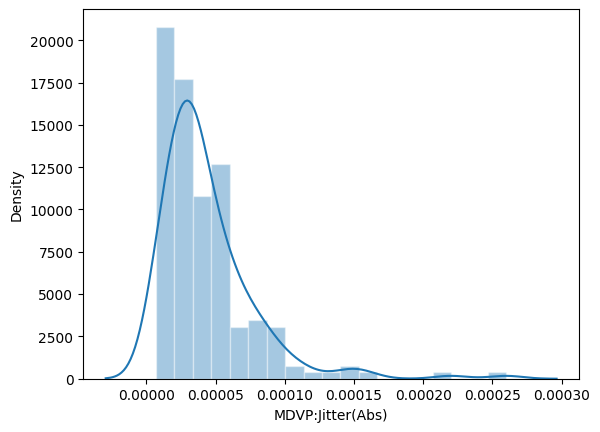

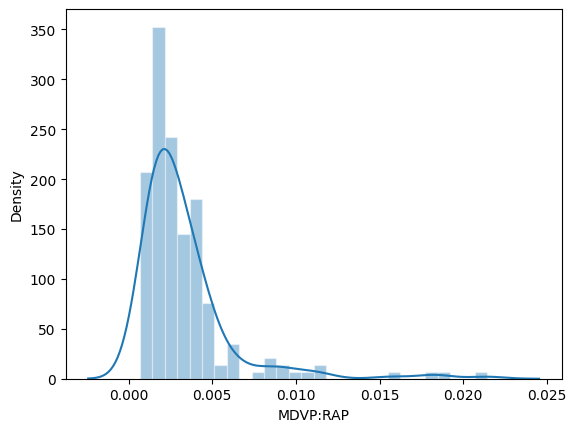

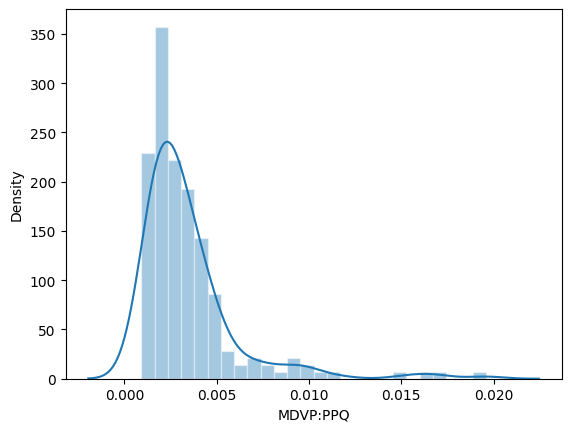

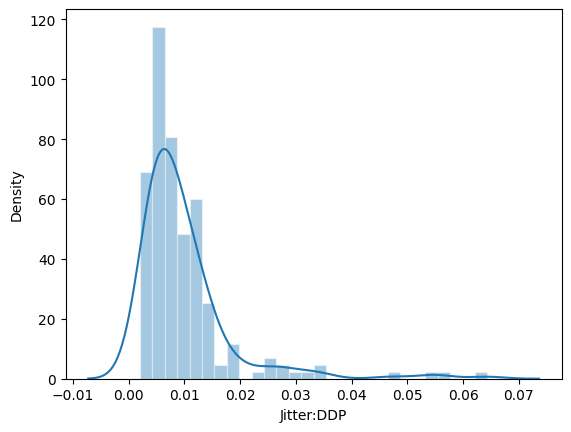

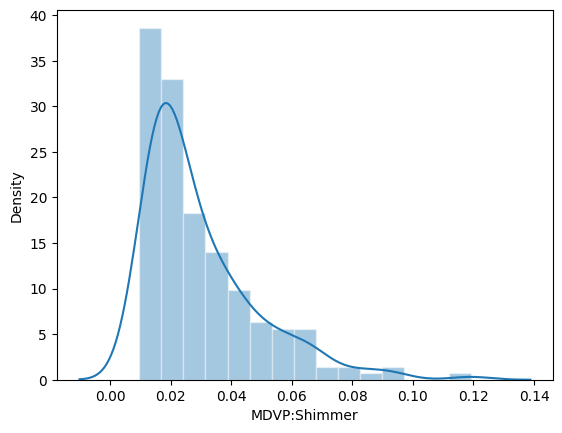

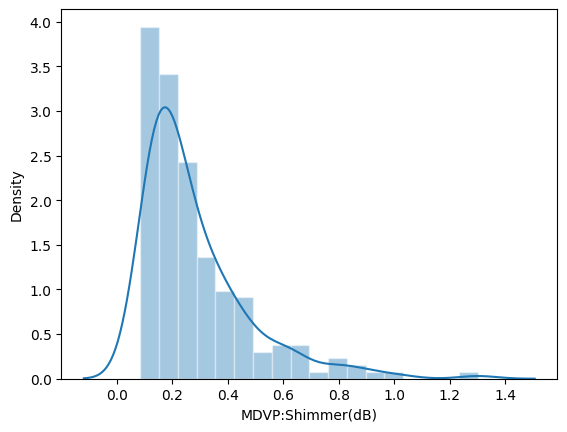

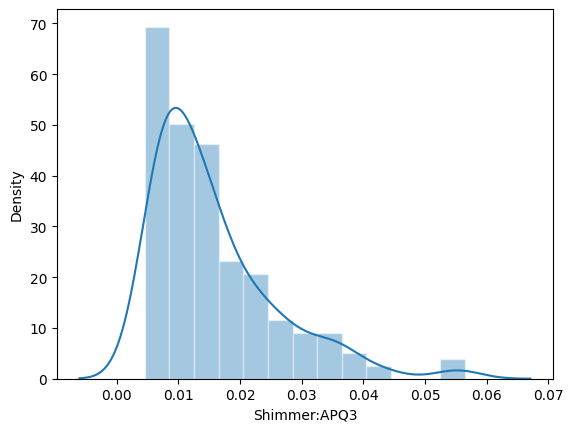

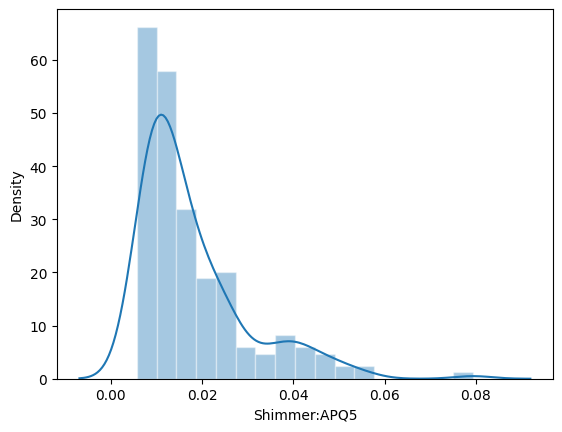

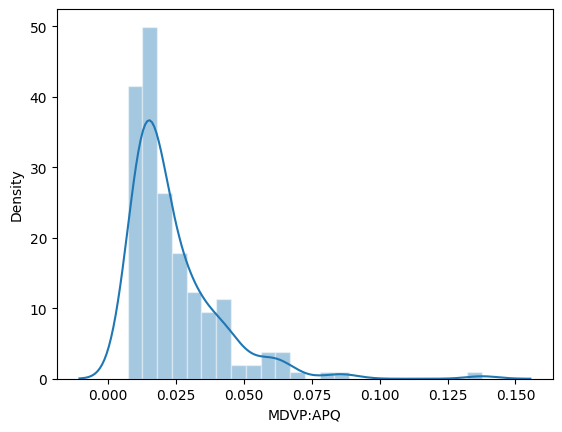

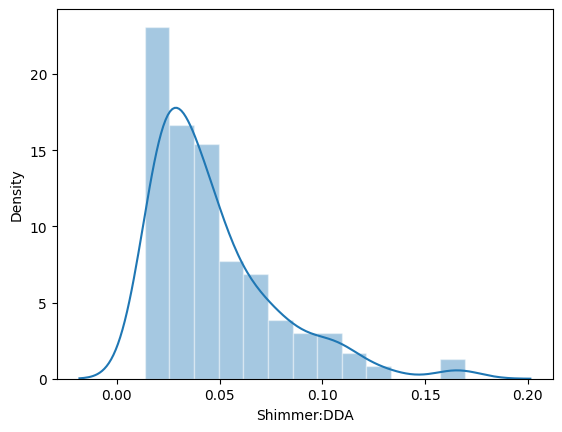

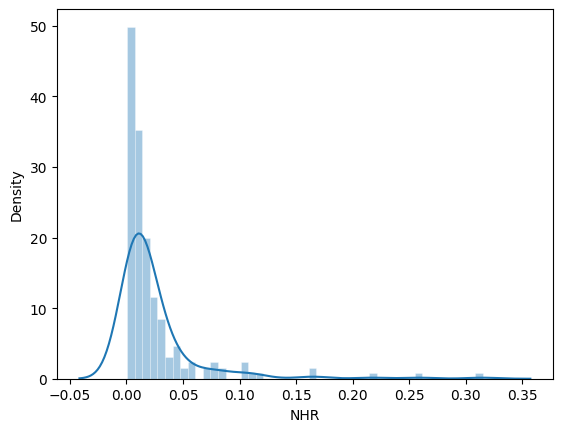

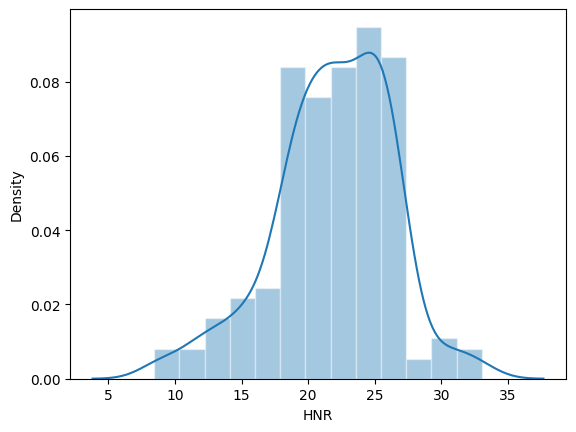

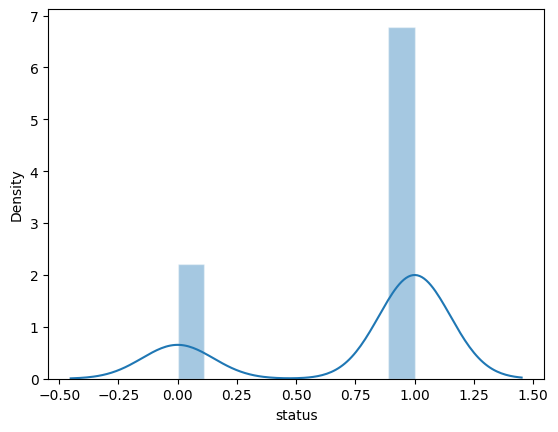

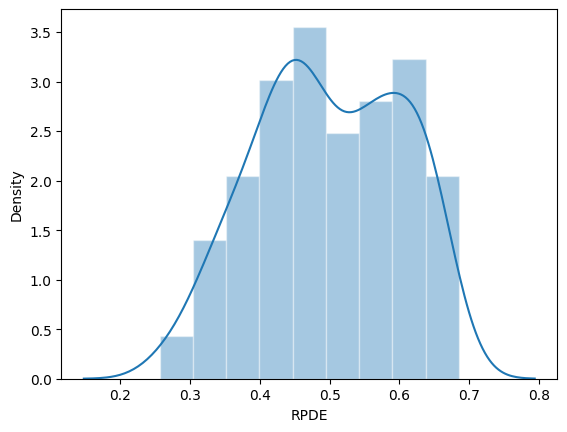

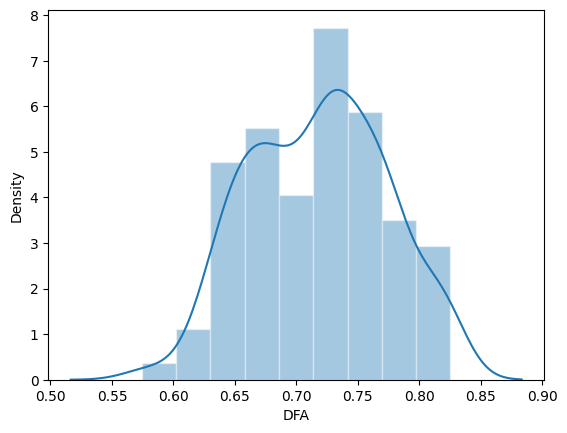

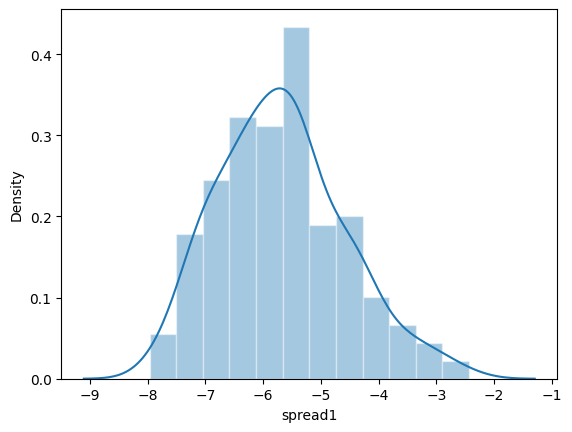

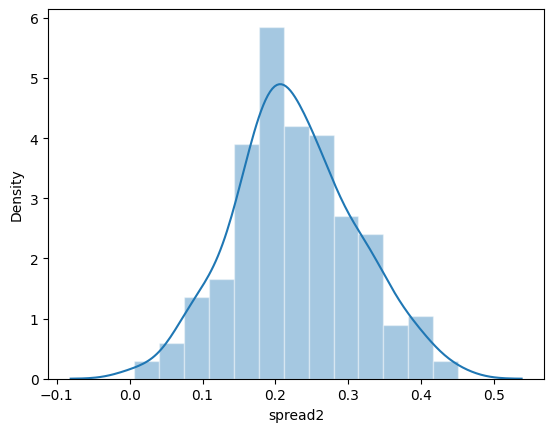

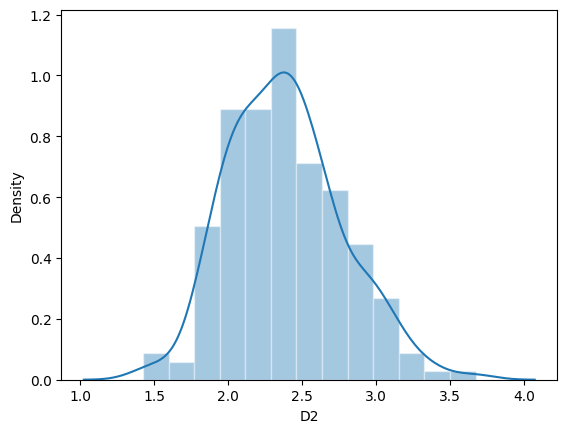

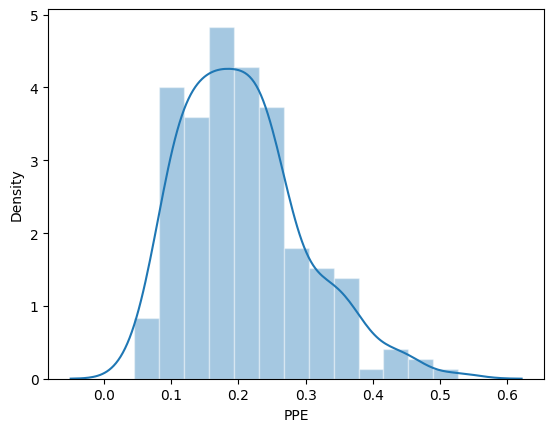

In [8]:
# Find the distribution of all data columns to make sure the data is applicable to teh entire population (normal distribution/bell curve as per central limit theorem)

def distplots(col):
    sns.histplot(
    df[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
    plt.show()

for i in list(df.columns[1:]):
    distplots(i)

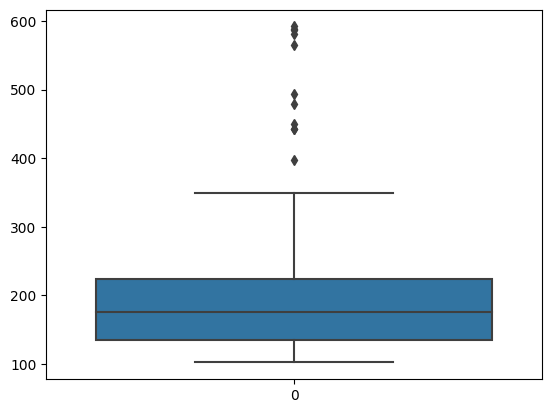

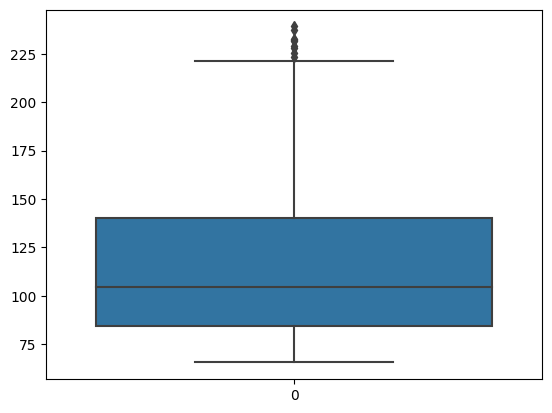

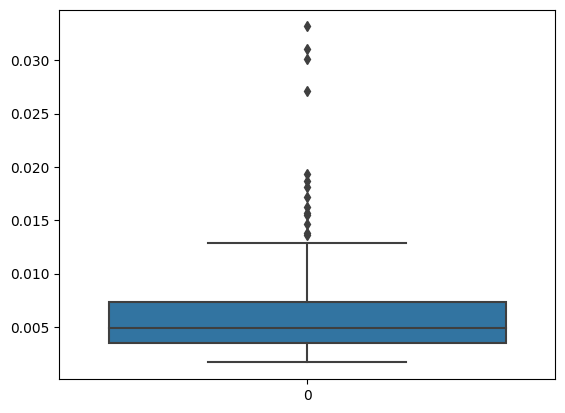

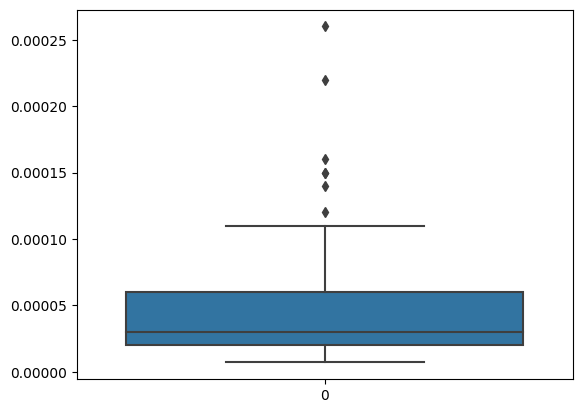

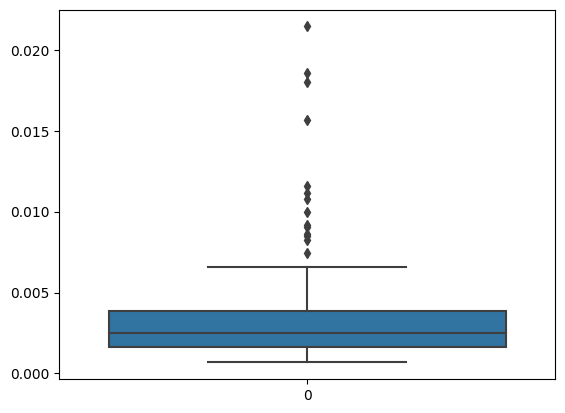

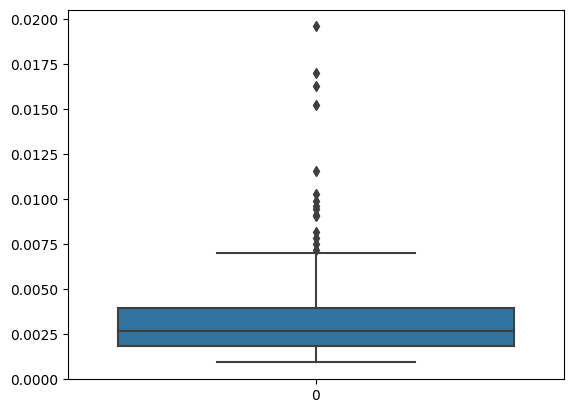

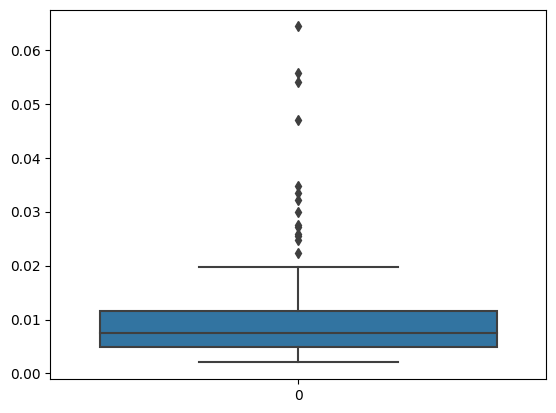

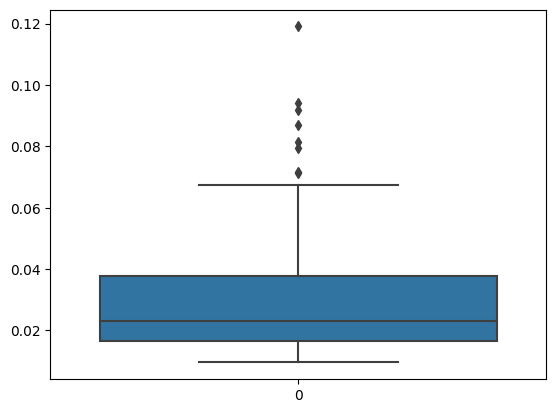

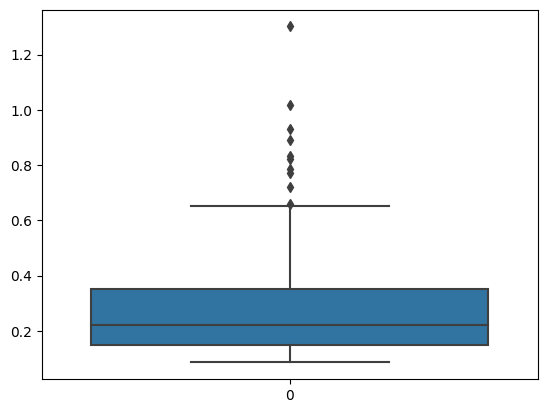

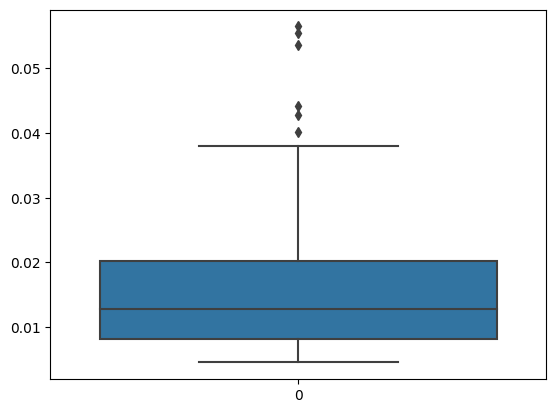

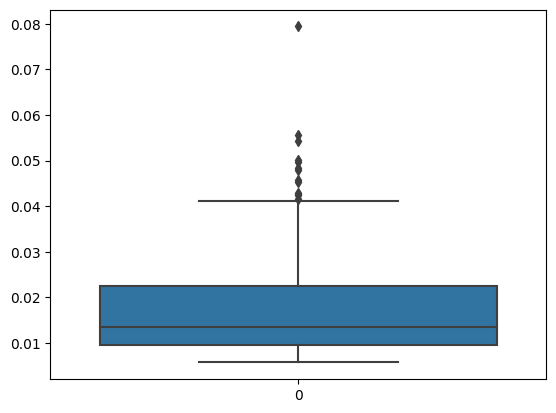

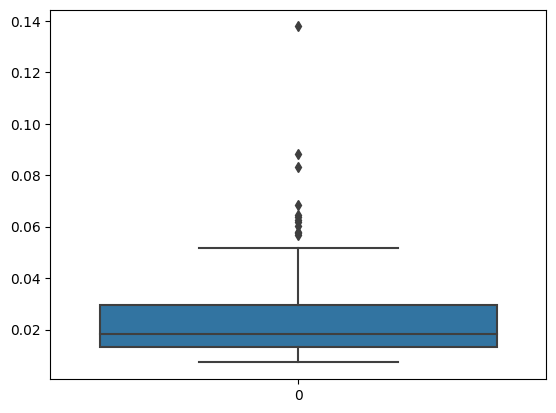

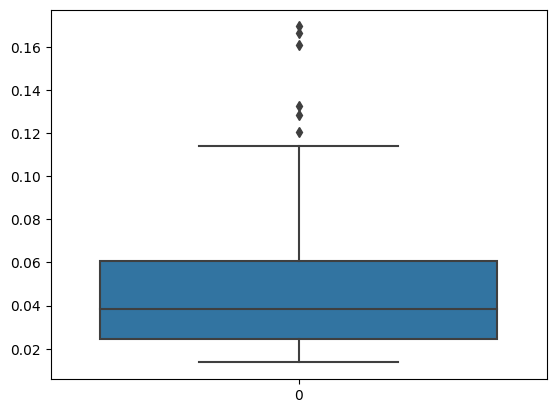

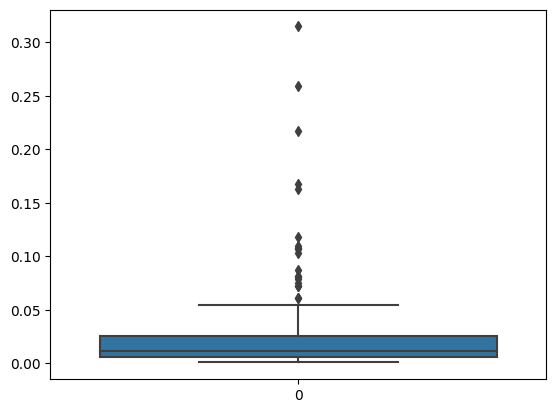

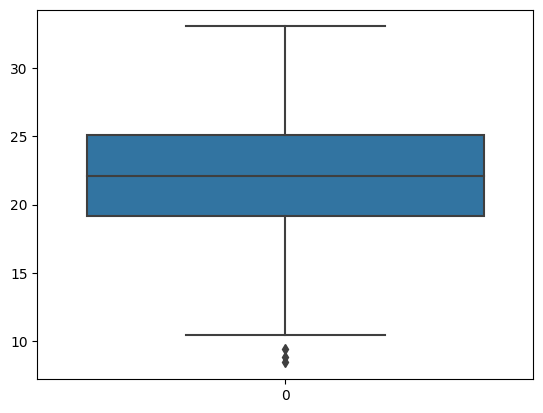

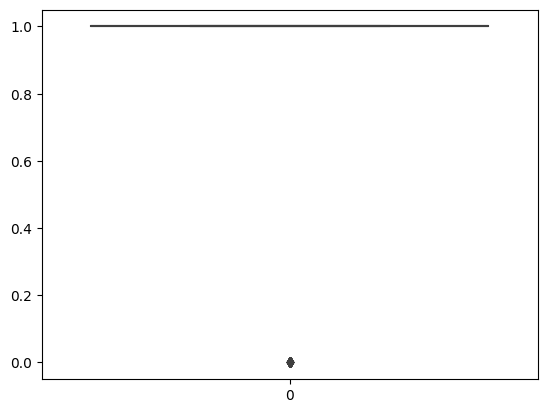

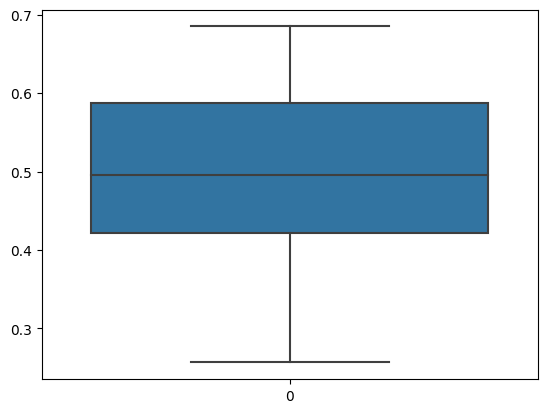

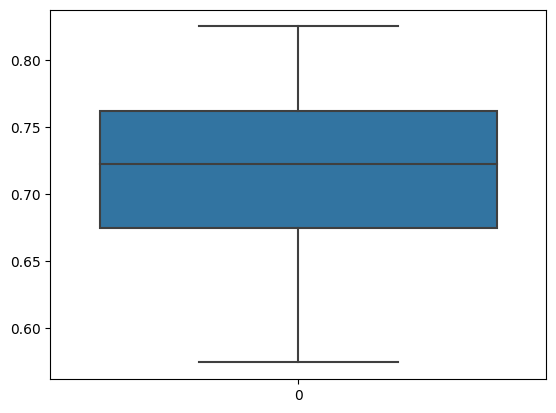

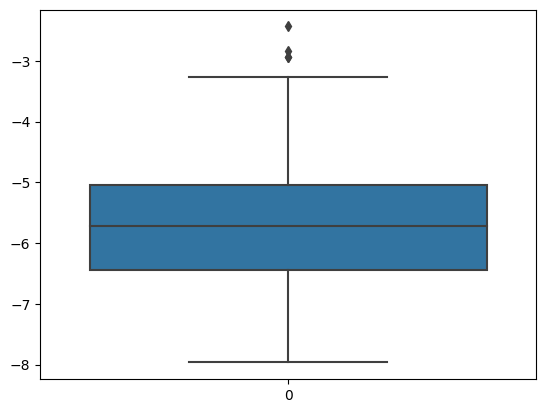

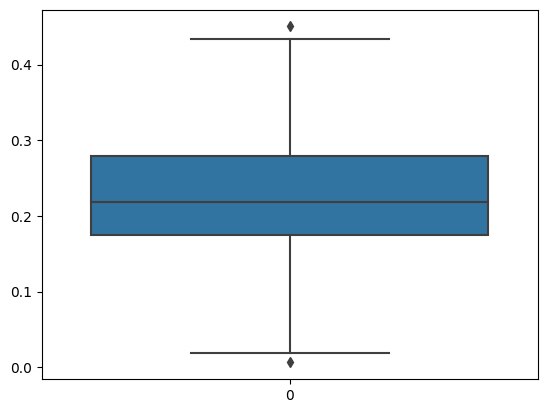

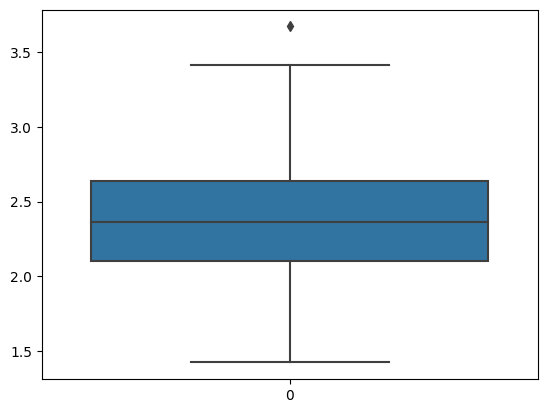

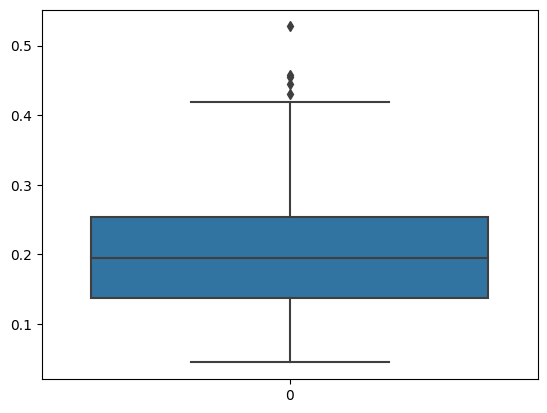

In [9]:
# Finding the outliers in the data by creating boxplots
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

<AxesSubplot: >

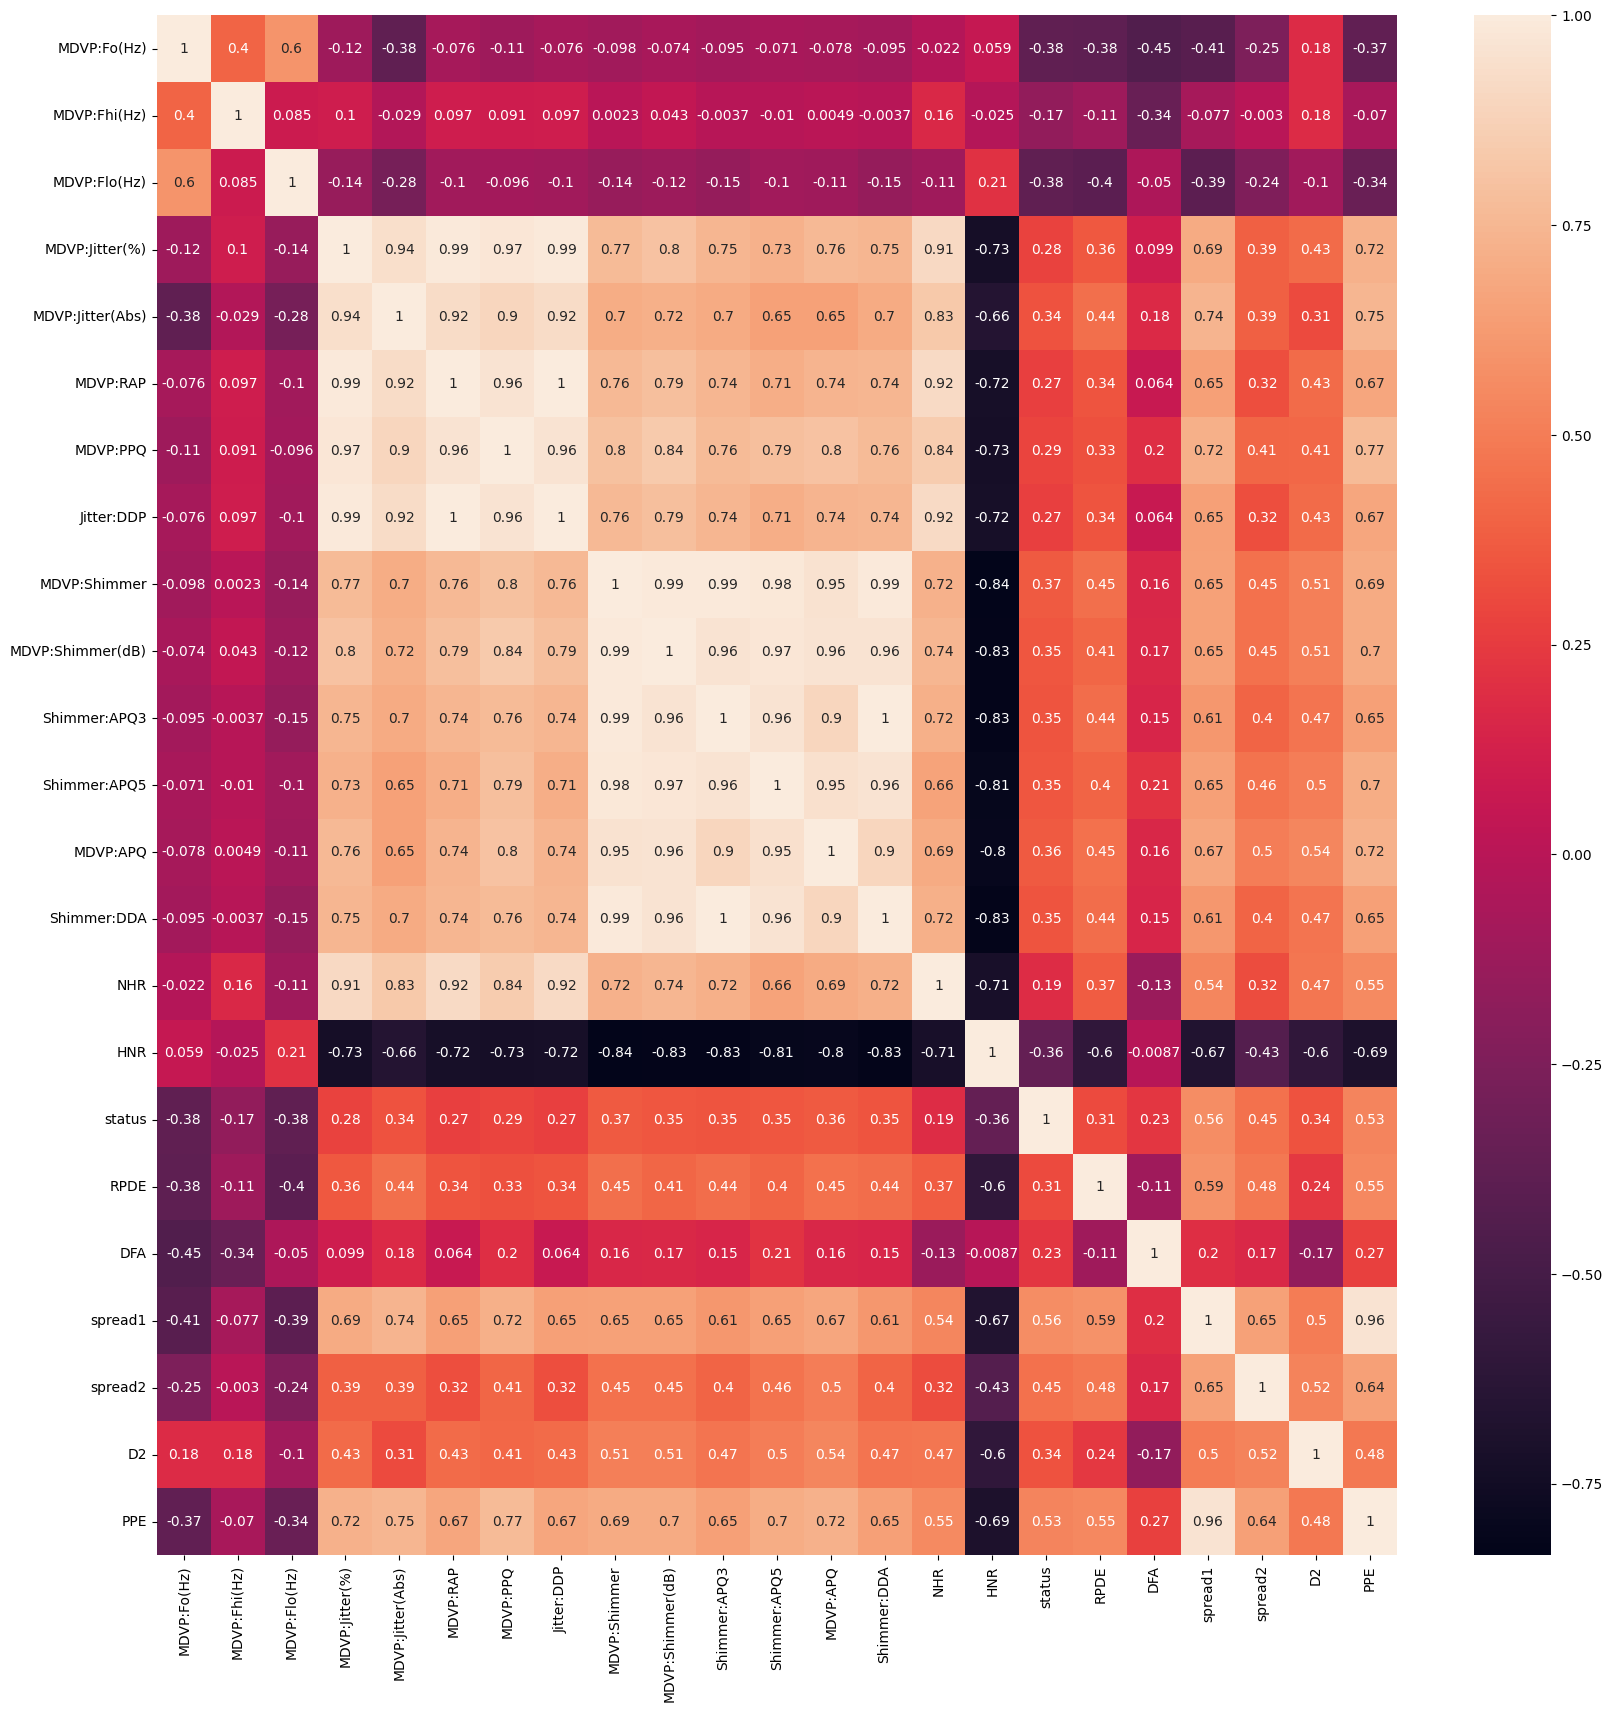

In [10]:
# Finding correlations. The indpendent variables should be highly correlated with the dependent variables.
plt.figure(figsize=(20,20))
corr=df.corr()
# annot measures the actual value of the correlations
sns.heatmap(corr,annot=True)

In [11]:
# Seperating the independent and dependent variables and dropping the ID column
x=df.drop(['status','name'],axis=1)
y=df['status']

In [12]:
# Using the imblearn library to detect label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))


Counter({1: 147, 0: 48})


In [13]:
# Balancing the unbalanced labels 
rand_over = RandomOverSampler()

x_rand_over, y_rand_over = rand_over.fit_resample(x,y)
print(Counter(y_rand_over))

Counter({1: 147, 0: 147})


In [14]:
# Scaling using the MinMaxScaler to insure there is no overfit when fitting data into the model
#.fit_transforms() fits to the data and transforms it.
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_rand_over)
y = y_rand_over

In [15]:
# Applying PCA (Principal Component Analysis) to choose the minimum number of principal components, so there is 95% of the variance.
# This allows for data to be represented as a smaller set of variables, so trends, clusters, outliers, etc. can be seen
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_PCA = pca.fit_transform(x)

# Checking that PCA has reduced to a smaller set of variables that preserve 95% of the variance.
print(x.shape)
print(X_PCA.shape)

(294, 22)
(294, 8)


In [16]:
# Splitting dataset into training and testing sets while keeping 20% of the data for testing and 80% for training
x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2,random_state=7)

                    Algorithm Used  Accuracy
0              Logistic Regression  0.847458
1                     Decison Tree  0.847458
2  Random Forest(Information Gain)  1.000000
3           Random Forest(Entropy)  1.000000
4                              SVM  0.881356
5                              KNN  0.983051
6                              gnb  0.847458
7                              bnb  0.830508
8                voting classifier  0.847458
AxesSubplot(0.125,0.11;0.775x0.77)


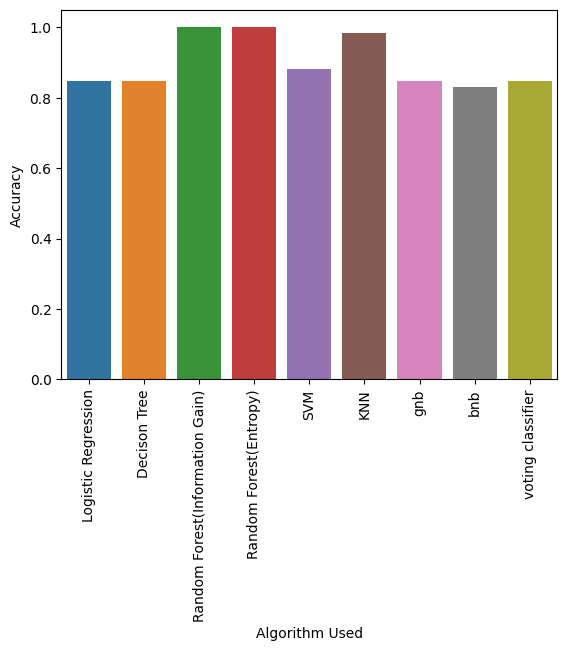

In [17]:
# Importing required metrics
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

met_li=[]
accuracy_li=[]

# Getting accuracy score from a myriad of methods 

# Applying logistic regression
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')

# Fitting the data into the model
lr=classifier.fit(x_train,y_train)

# Making a prediction
y_pred = classifier.predict(x_test)

# Finding the accuracy score by inputting the predicted value and actual value
accuracy_LR=accuracy_score(y_test,y_pred)

# Applying a decision tree to get an accuracy score
from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train,y_train)

# Making a prediction
y_pred2 = classifier.predict(x_test)

# Finding the accuracy score by inputting the predicted value and actual value
accuracy_DT=accuracy_score(y_test,y_pred2)

# Applying Random Forest criteria=information gain
from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train,y_train)

# Making a prediction
y_pred3 = classifier3.predict(x_test)

# Finding the accuracy score by inputting the predicted value and actual value
accuracy_RFI=accuracy_score(y_test,y_pred3)

# Applying Random Forest criteria-entropy
from sklearn.ensemble import RandomForestClassifier

classifier4 = RandomForestClassifier(criterion='entropy')
rfe = classifier4.fit(x_train,y_train)

# Making a prediction
y_pred4 = classifier4.predict(x_test)

# Finding the accuracy score by inputting the predicted value and actual value
accuracy_RFE = accuracy_score(y_test,y_pred4)

# Applying Support Vector Machine

from sklearn.svm import SVC

model_svm = SVC(cache_size=100)
svm=model_svm.fit(x_train, y_train)

# Making a prediction
y_pred5 = model_svm.predict(x_test)

# Finding the accuracy score by inputting the predicted value and actual value
accuracy_svc= accuracy_score(y_test, y_pred5)

# Applying K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)

# Making a prediction with Test Set N=3
pred_knn3= model_knn3.predict(x_test)

# Finding the accuracy score by inputting the predicted value and actual value
accuracy_SVM = accuracy_score(y_test, pred_knn3)

# Applying Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb=gnb.fit(x_train, y_train)

# Making a prediction
pred_gnb = gnb.predict(x_test)

# Finding the accuracy score by inputting the predicted value and actual value
accuracy_GNB = accuracy_score(y_test, pred_gnb)

# Applying Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
bnb=model.fit(x_train, y_train)

# Making a prediction
pred_bnb = model.predict(x_test)

# Finding the accuracy score by inputting the predicted value and actual value
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# Combining all the above methods and finding the best algorithm using a voting classifier (this is like a bagging algorithm)
from sklearn.ensemble import VotingClassifier

evc=VotingClassifier(estimators=[('lr', lr), ('rfi', rfi),('rfe', rfe), ('DT', dt),
                                 ('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',
                                 flatten_transform=True)

model_evc=evc.fit(x_train, y_train)

# Making a prediction
pred_evc = evc.predict(x_test)

# Finding the accuracy score by inputting the predicted value and actual value
accuracy_evc = accuracy_score(y_test, pred_gnb)

# Creating three lists containing the algorithm names, tghe algorithm accuracies, and the training models
algo_names=['Logistic Regression','Decison Tree','Random Forest(Information Gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','voting classifier']
algo_acc=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
train_models=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

# Creating a dataframe that has the algorithm used and accuracy
df_Accuracy=pd.DataFrame({'Algorithm Used': algo_names,'Accuracy': algo_acc})
print(df_Accuracy)

# Creating a barchart that  allows for visualization of the best-performing algorithms in terms of accuracy score
chart=sns.barplot(x='Algorithm Used',y='Accuracy',data = df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [18]:
# Initializing and training an XGBClassifier and training the model that classifies with gradient boosting algortihms
model_xg=XGBClassifier()
model_xg.fit(x_train,y_train)

# Making a prediction
y_pred = model_xg.predict(x_test)

# Printing the model's accuracy score
print(accuracy_score(y_test,y_pred)*100)

98.30508474576271


In [19]:
# Calling a confusion matrix (which allows comparison of false positives, true negatives, etc.) using the actual value and the predicted value
from sklearn.metrics import f1_score

# What y_pred is equal to is used instead of y_pred because loops will be used
conf_matrix=confusion_matrix(y_test,model_xg.predict(x_test))

In [20]:
# Obtaining an F1 score that is a weighted average of the precision and recall
from sklearn.metrics import f1_score

f1_score(y_test,model_xg.predict(x_test),average='binary')

0.9855072463768115

In [21]:
# Creating a classification report that displays all evaluation matrices and shows accuracy, etc.
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, model_xg.predict(x_test)))
print('Confusion Matrix:')
# False negative is bottom left and false positive is top right of the confusion matrix
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        35

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59

Confusion Matrix:
[[24  0]
 [ 1 34]]


In [22]:
# Applying the above cell on every algorithm
for i in train_models:
    print(i)
    print(classification_report(y_test,i.predict(x_test)))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,i.predict(x_test)))
    print()

LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.83      0.87        35

    accuracy                           0.85        59
   macro avg       0.84      0.85      0.84        59
weighted avg       0.85      0.85      0.85        59

Confusion Matrix:
[[21  3]
 [ 6 29]]

DecisionTreeClassifier(random_state=14)
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.94      0.97        35

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Confusion Matrix:
[[24  0]
 [ 2 33]]

RandomForestClassifier(random_state=14)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1

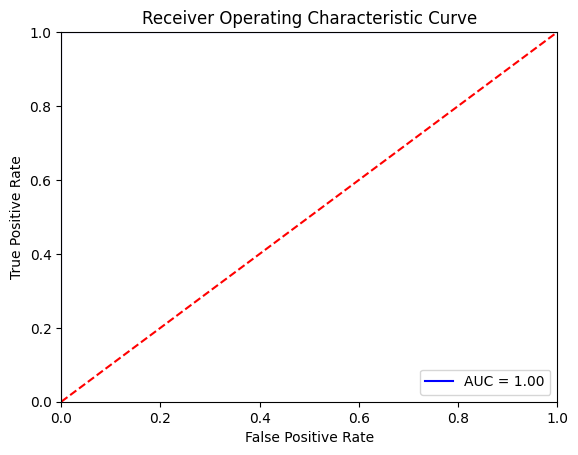

In [23]:
# Visualizing the performance with an ROC curve (the farther a line is to the line y=x, the better the model because the more true classifications and less false classifications)
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
def plot_roc(model,x_test,y_test):
    probabilities = model.predict_proba(np.array(x_test))

    # False Positive Rate = fpr, True Positive Rate = tpr
    predictions = probabilities
    fpr,tpr,threshold=roc_curve(y_test,predictions[:,1])

    # Find the area under the curve by fitting fpr and tpr into the AUC method
    roc_auc = auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic Curve')
    plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc(model_xg,x_test,y_test)


ROC Curve for Logistic Regression & PCA


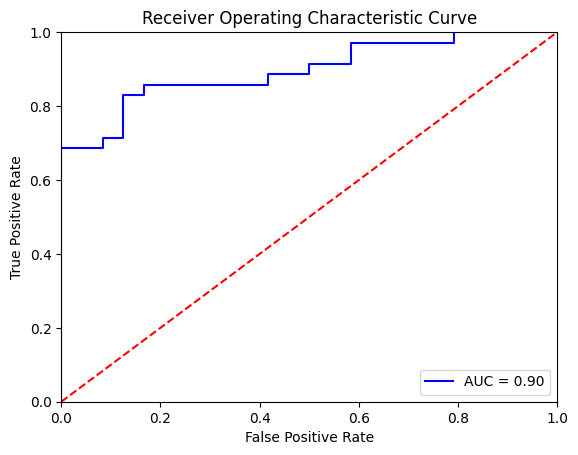



ROC Curve for Decison Tree & PCA


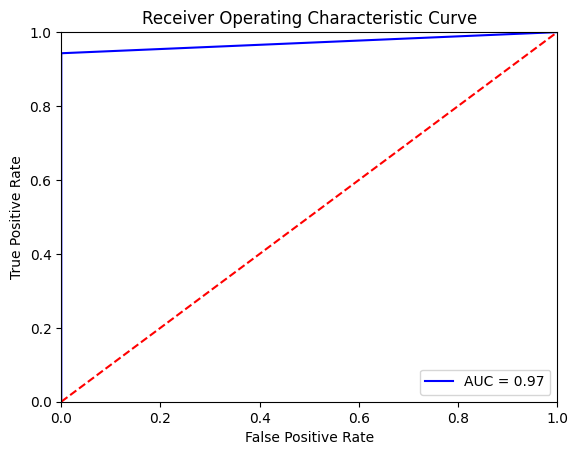



ROC Curve for Random Forest(Information Gain) & PCA


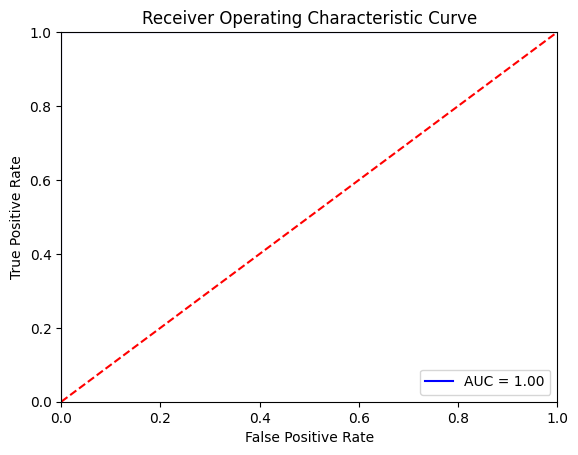



ROC Curve for Random Forest(Entropy) & PCA


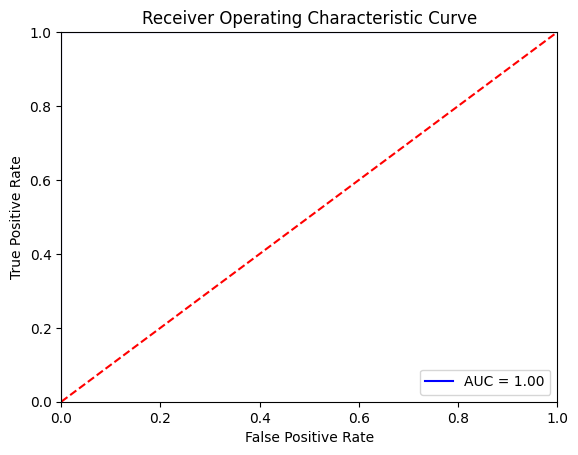



ROC Curve for SVM & PCA
ROC Curve Not Valid

ROC Curve for KNN & PCA


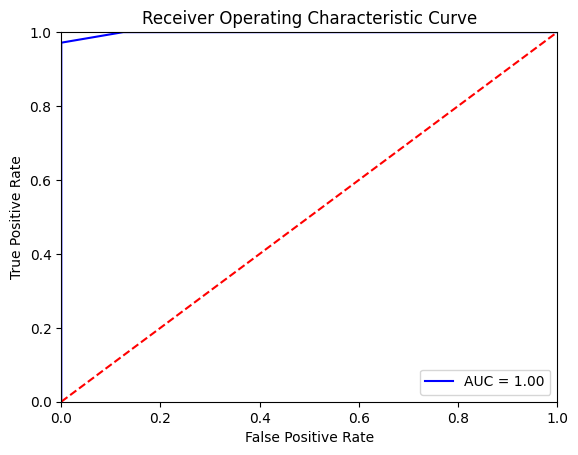



ROC Curve for gnb & PCA


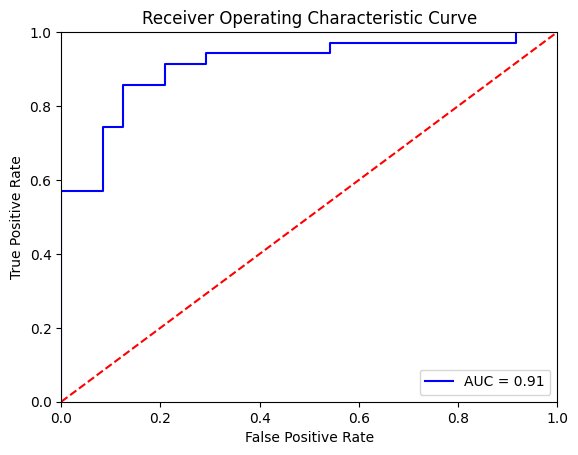



ROC Curve for bnb & PCA


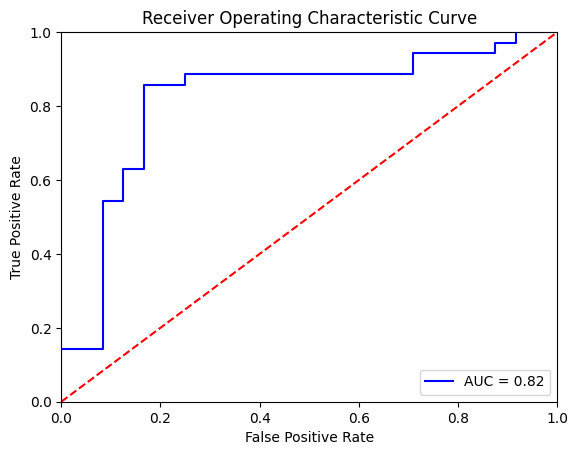

In [24]:
# Using the above ROC curve-generating function for every model to determine the best model in terms of the highest true positive rate to false positive rate
# The closer the AUC to 1, the better the model
for i in range(len(train_models)):
    try:
        print()
        print('ROC Curve for',algo_names[i],'& PCA')
        plot_roc(train_models[i], x_test, np.array(y_test))
        print()
    except:
        print('ROC Curve Not Valid')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5338c8cb-65a8-4f50-81c6-d16a3d2c0f2b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>